### Case Study 1

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import pickle

#### Wczytanie danych

In [45]:
dane = pd.read_csv("../datasets/case1.csv", delimiter=";",index_col=0)

print(dane.shape)
dane.head()

(9841, 50)


,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [46]:
# Wyświetlenie kilku pierwszych wierszy danych
dane.head()

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [47]:
dane.describe()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [48]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841 non-

In [49]:
#usunięcie dwóch pierwszych kolumn
dane = dane.iloc[:,2:]

In [50]:
# Przekształcenie zmiennych typu 'object' na 'category
categories = dane.select_dtypes('O').columns.astype('category')
dane[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [51]:
# Sprawdzenie kategorii 'categories'
for i in dane[categories].columns:
    print(f'The categorical column --{i}-- has --{len(dane[i].value_counts())}-- unique values')

The categorical column --ERC20 most sent token type-- has --304-- unique values
The categorical column --ERC20_most_rec_token_type-- has --466-- unique values


In [52]:
# Sprawdź wartości liczbowe 'numericals'
numericals = dane.select_dtypes(include=['float','int']).columns
dane[numericals].describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [53]:
# Badanie zmienności cech
dane[numericals].var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

FLAG
0    7662
1    2179
Name: count, dtype: int64


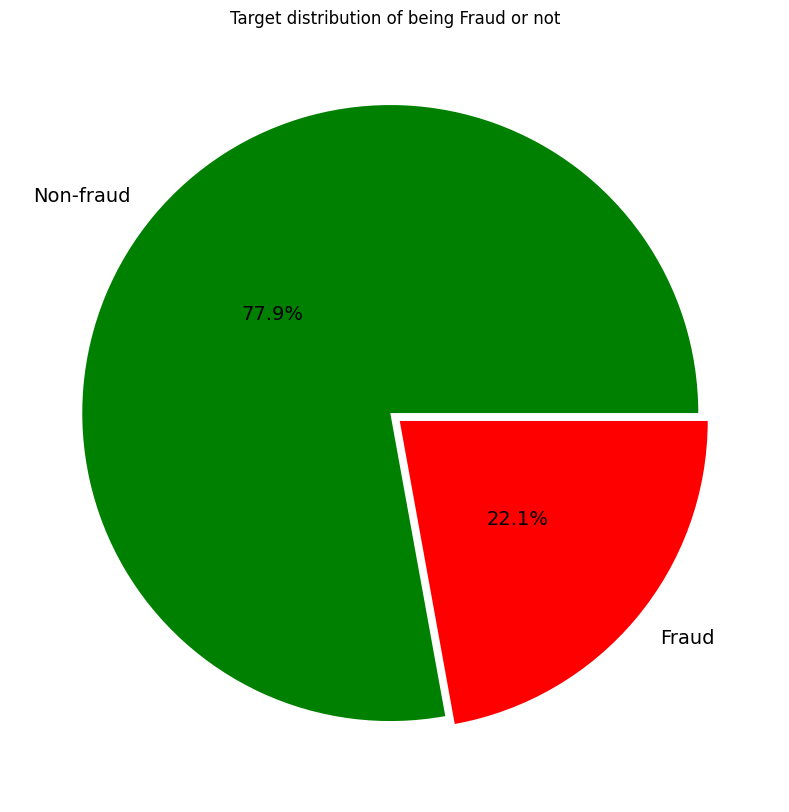

In [54]:
# Sprawdzenie rozkładu zmiennej docelowej
print(dane['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['green', 'red']
plt.pie(x = dane['FLAG'].value_counts(),autopct='%.1f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution of being Fraud or not')
plt.show()



#### Czyszczenie danych

In [55]:
# Sprawdzenie braków danych
print(dane.isnull().sum())

FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contract                                 0
max val sent to contract

<Axes: >

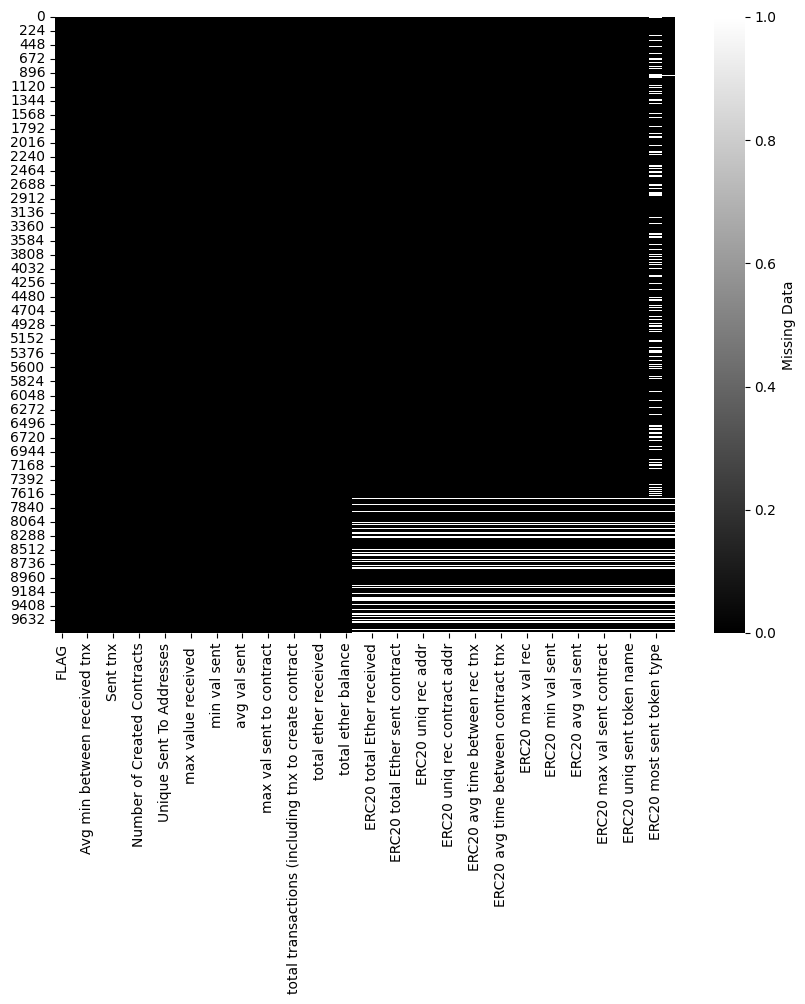

In [56]:
# Wizualizacja braków danych
plt.figure(figsize=(10,8))
sns.heatmap(dane.isna(),
            cmap="binary_r",
            cbar_kws={'label': 'Missing Data'})

In [57]:
#  Usunięcie dwóch kolumn kategorycznych (cechy) z ramki danych
dane.drop(dane[categories], axis=1, inplace=True)

In [58]:
# Zastępienie brakujących wartości za pomocą mediany 
dane.fillna(dane.median(), inplace=True)

(9841, 46)


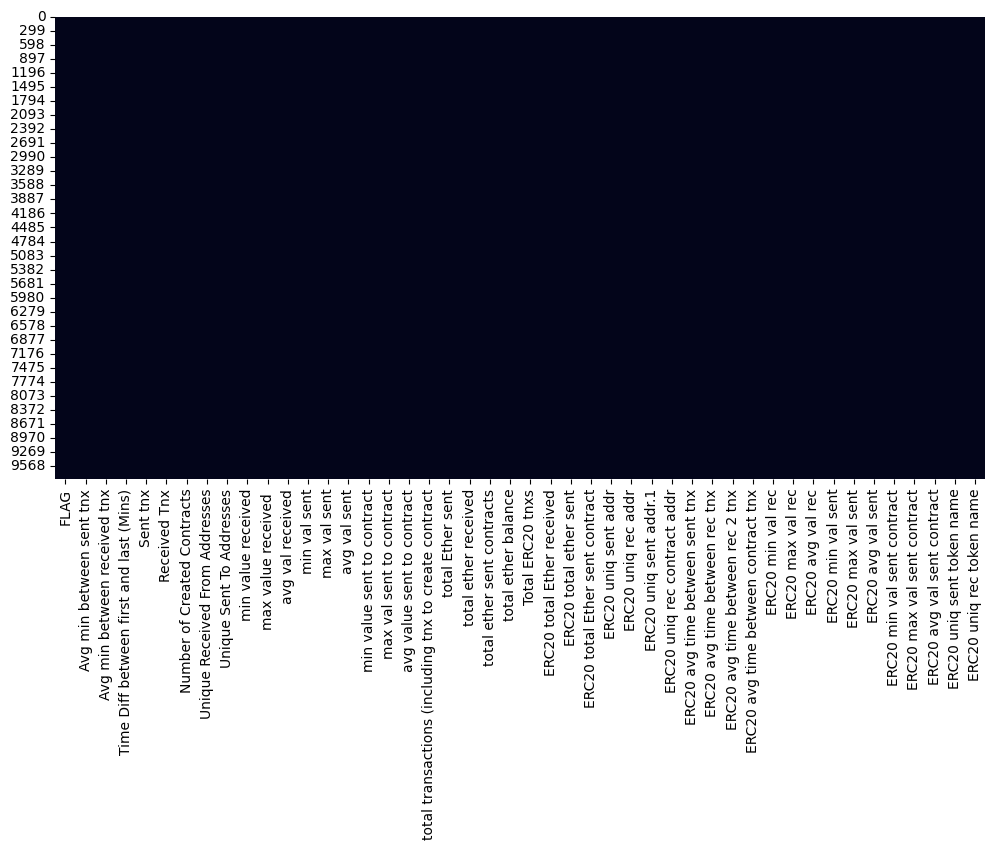

In [59]:
# Ponowna wizualizacja braków
print(dane.shape)
plt.figure(figsize=(12,6))
sns.heatmap(dane.isnull(), cbar=False)
plt.show()

##### Usunięcie cech, dla których wariancja wynosi zero.

In [60]:
# Filtrowanie cech z wariancją 0
no_var = dane.var() == 0
print(dane.var()[no_var])
print('\n')

#  Usunięcie cech, dla których wariancja wynosi zero
dane.drop(dane.var()[no_var].index, axis = 1, inplace = True)
print(dane.var())
print(dane.shape)

ERC20 avg time between sent tnx        0.0
ERC20 avg time between rec tnx         0.0
ERC20 avg time between rec 2 tnx       0.0
ERC20 avg time between contract tnx    0.0
ERC20 min val sent contract            0.0
ERC20 max val sent contract            0.0
ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062

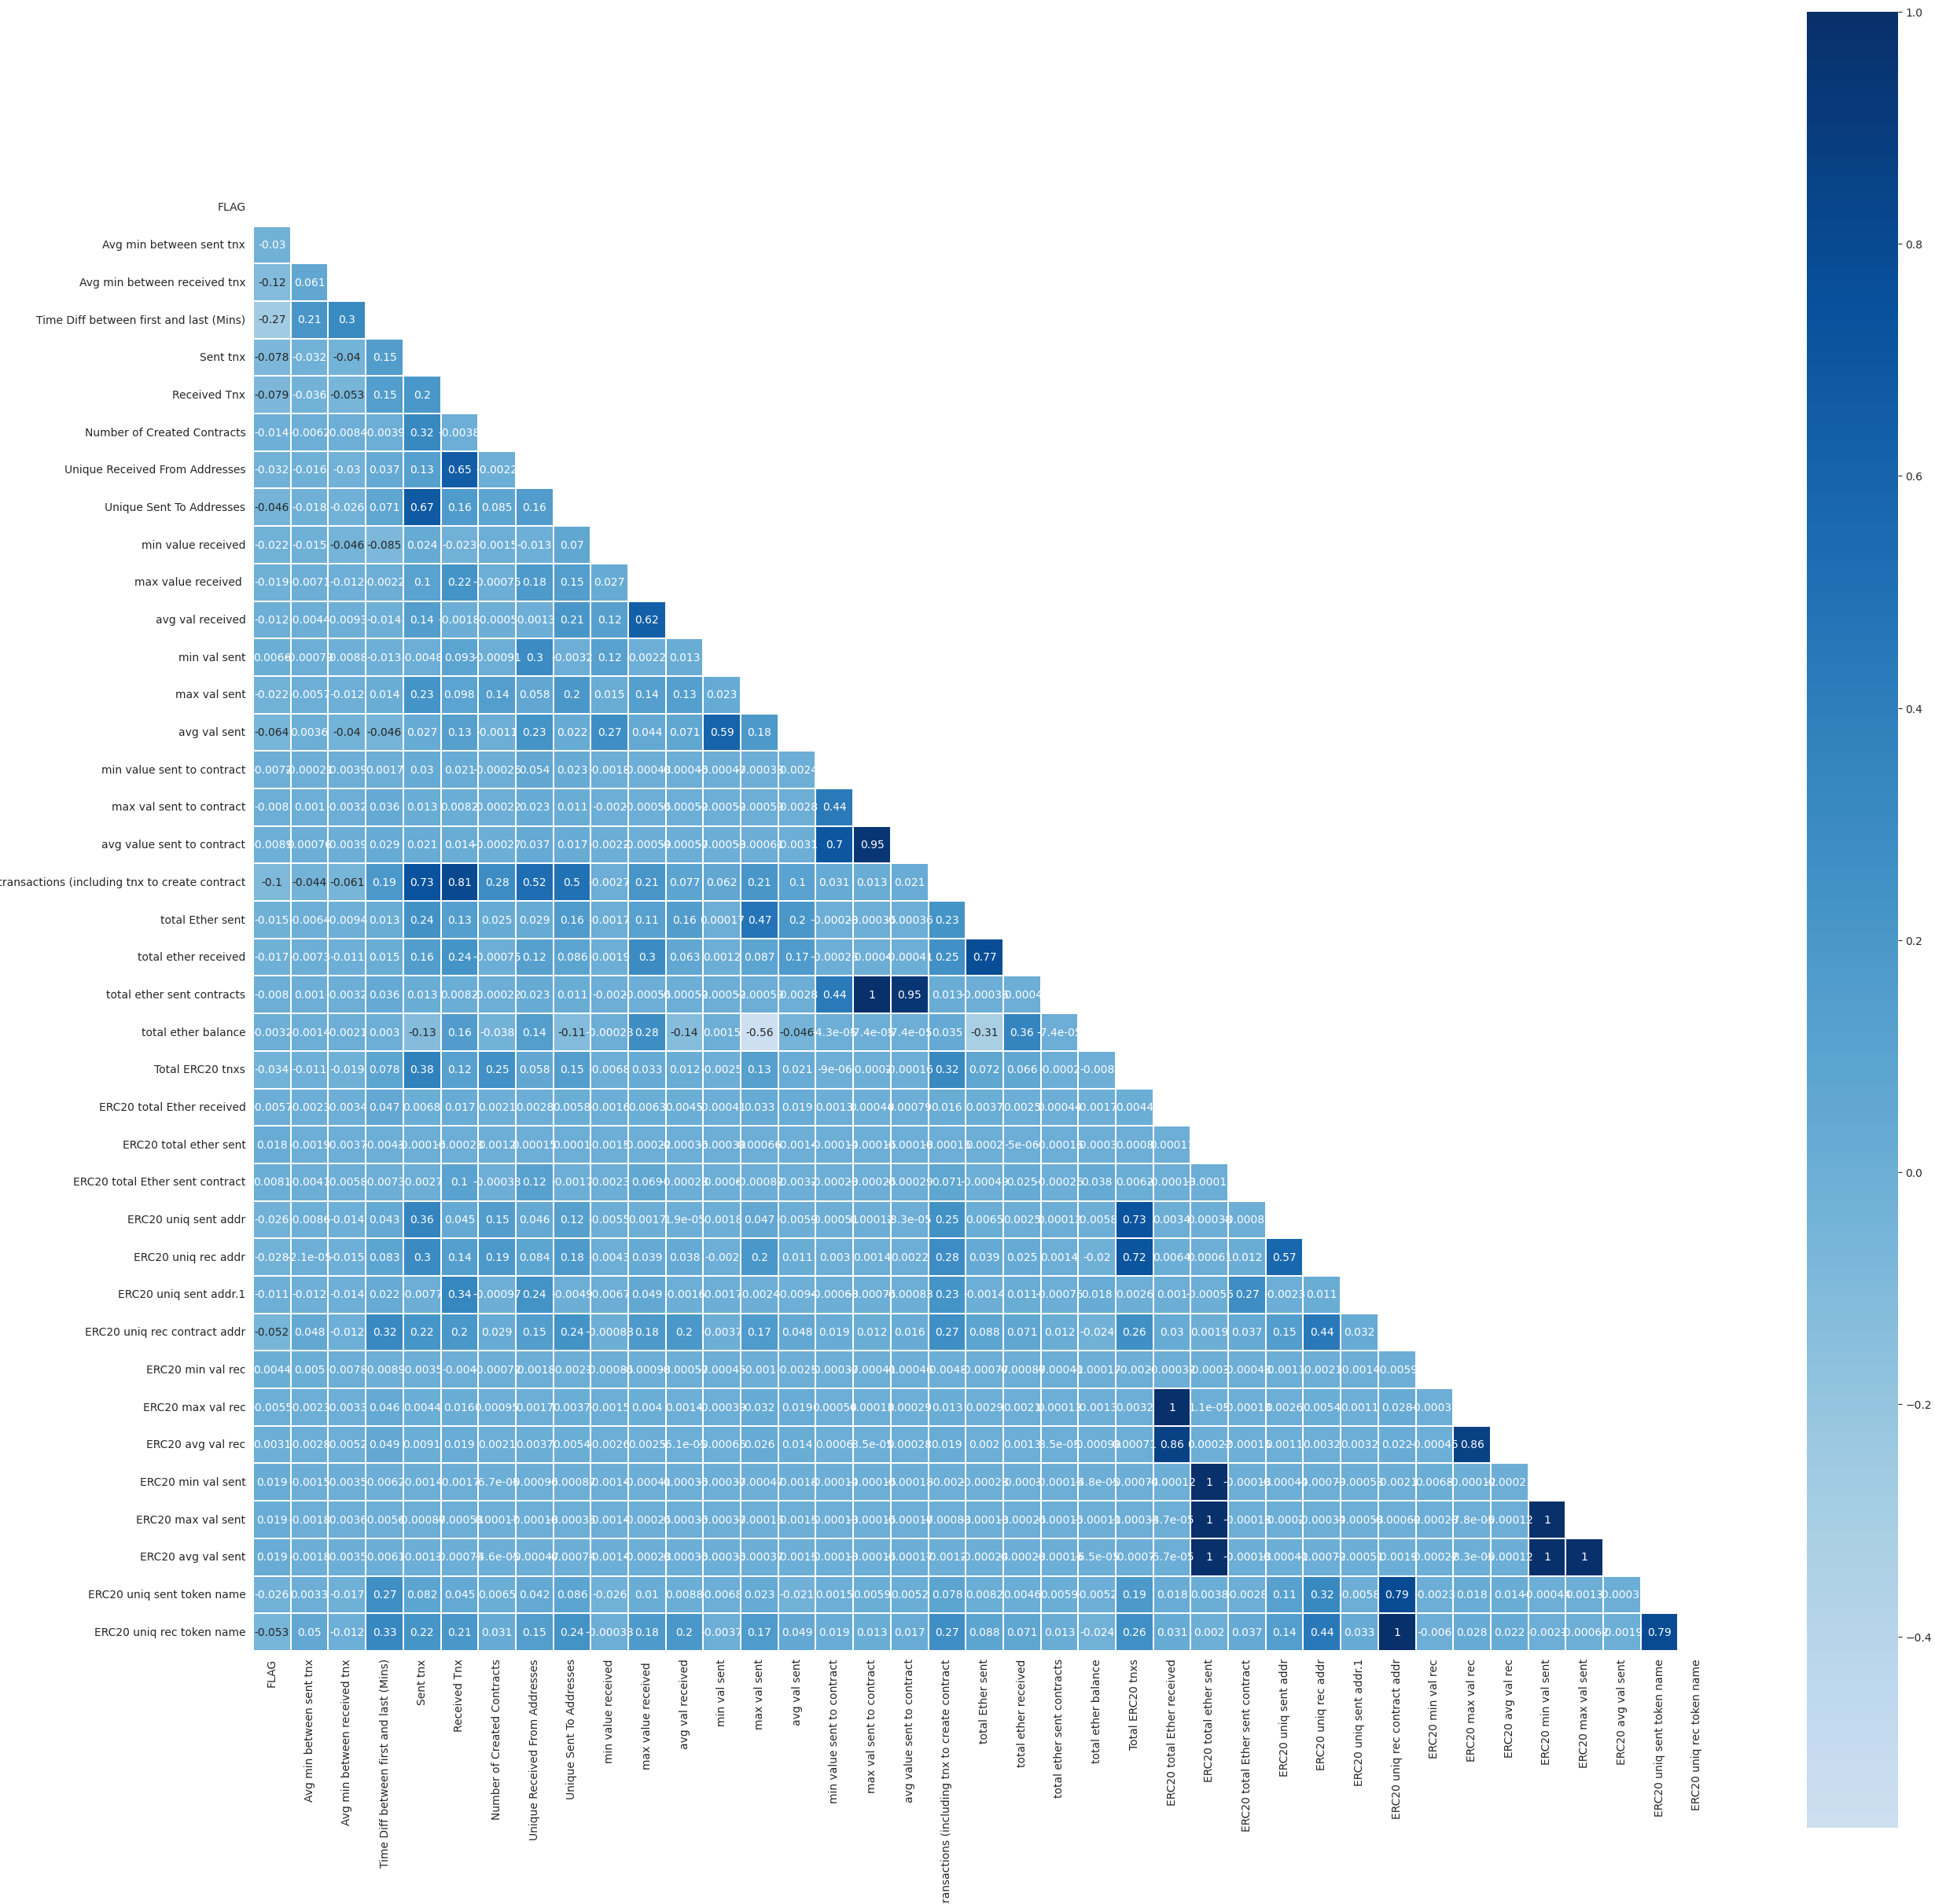

In [61]:
# Generowanie macierzy korelacji
corr = dane.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='Blues', center=0, linewidths=0.1, square=True)

In [62]:
#Usunięcie jednej z silnie skorelowanych cech 
drop = ['total transactions (including tnx to create contract', 
        'total ether sent contracts', 
        'max val sent to contract', 
        'ERC20 avg val rec',  
        'ERC20 max val rec',   
        'ERC20 uniq rec contract addr',  
        'ERC20 avg val sent',  
        'ERC20 min val sent',  
        'ERC20 max val sent',   
        'avg value sent to contract',  
        'ERC20 uniq sent token name',  ]
dane.drop(drop, axis=1, inplace=True)

In [ ]:
std_all = StandardScaler()
train_data_std = std_all.fit_transform(X_train)
train_data_std = pd.DataFrame(train_data_std, columns=X_train.columns)

pca = PCA(n_components=2)
components = pca.fit_transform(train_data_std)

fig = px.scatter(components, x=0, y=1, color=y_train, width=800)
fig.write_image("images/pca.png")
fig.show()

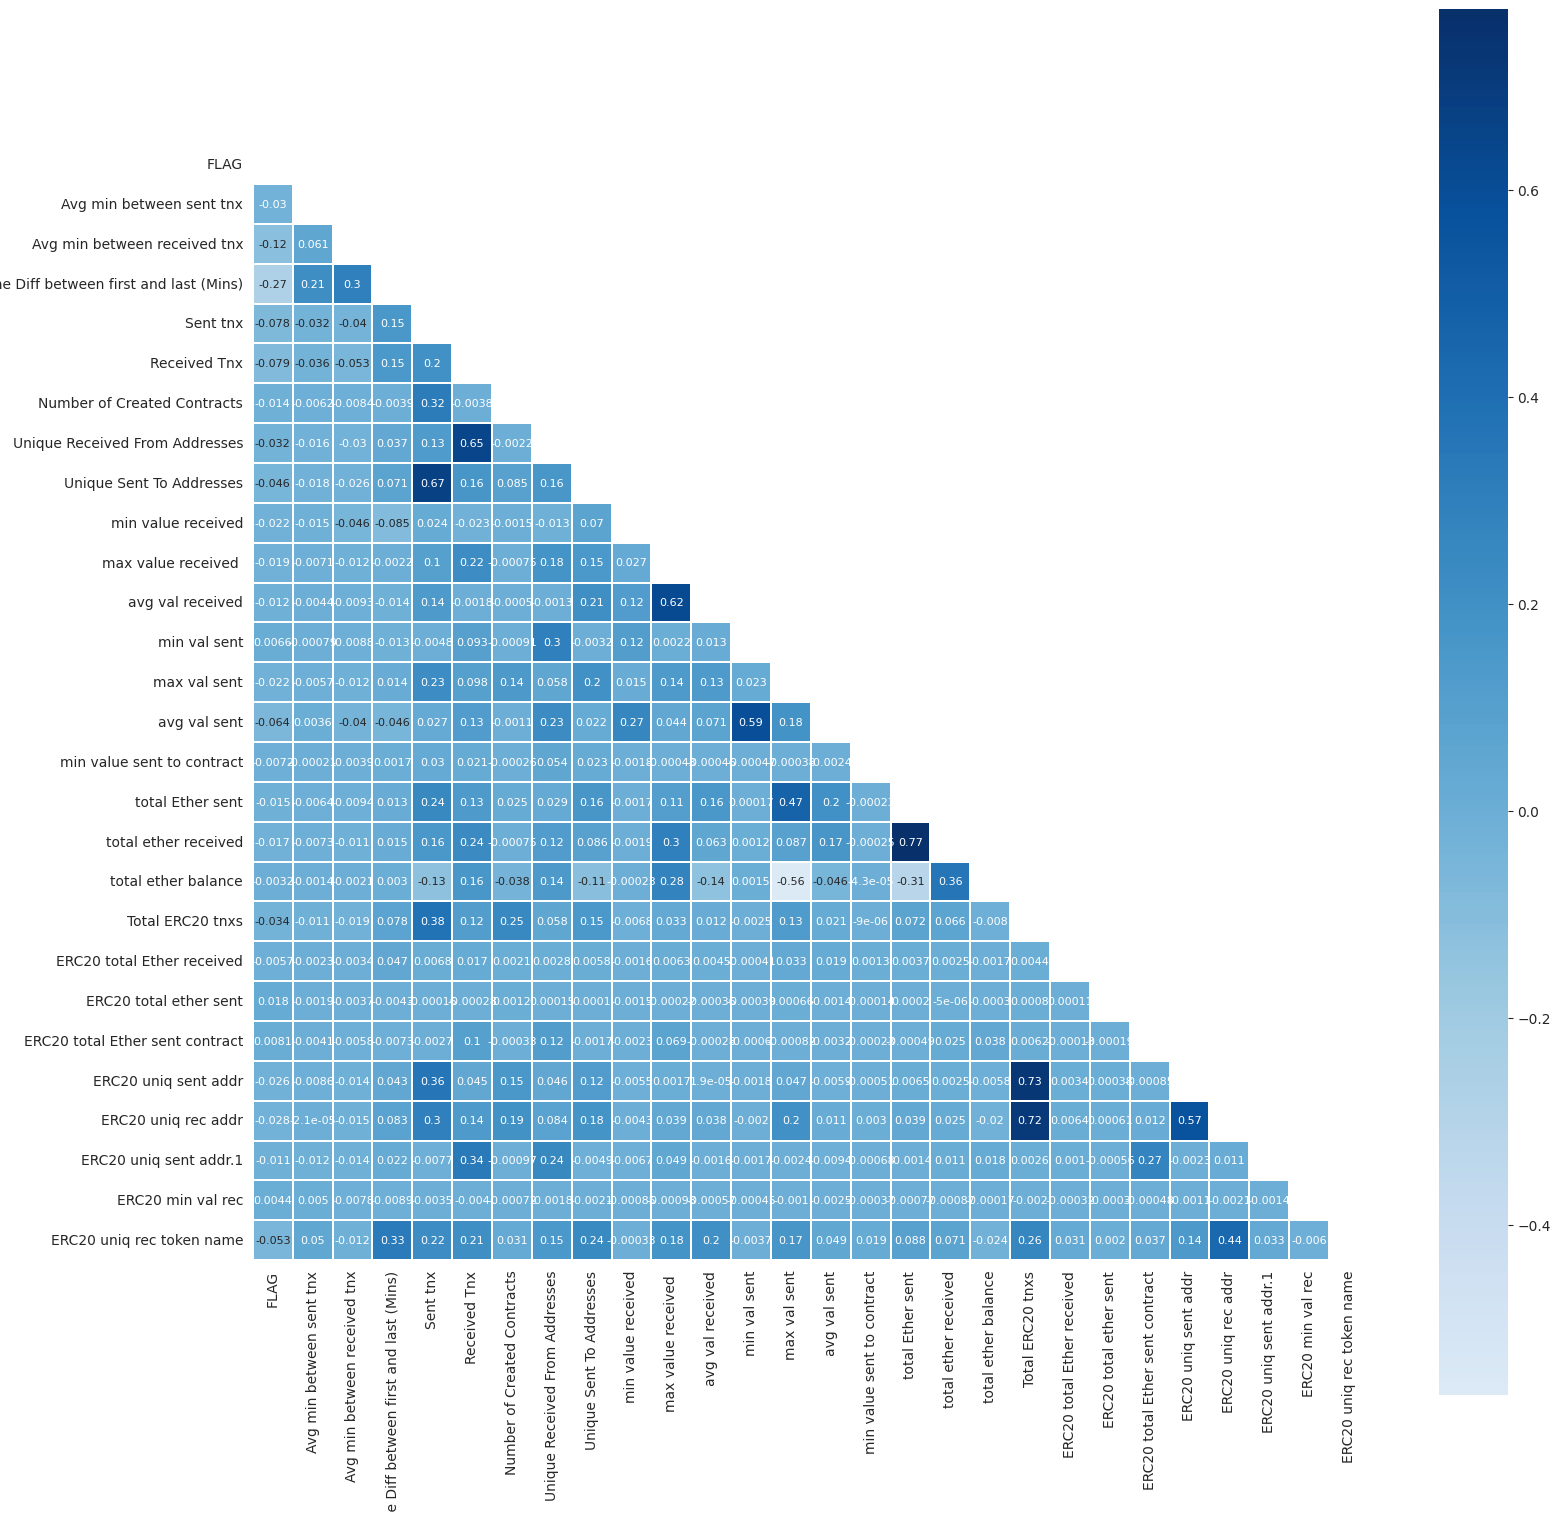

In [63]:
# Ostateczna macierz korelacji
corr = dane.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,18))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='Blues', center=0, linewidths=0.1, square=True,annot_kws={"size": 8})

### Przygotowanie danych

In [75]:
X = dane.iloc[:, 1:]
y = dane.iloc[:, 0]
print(X.shape, y.shape)

(9841, 27) (9841,)


#### Podział danych na zbiór treningowy i testowy

In [76]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 27) (7872,)
(1969, 27) (1969,)


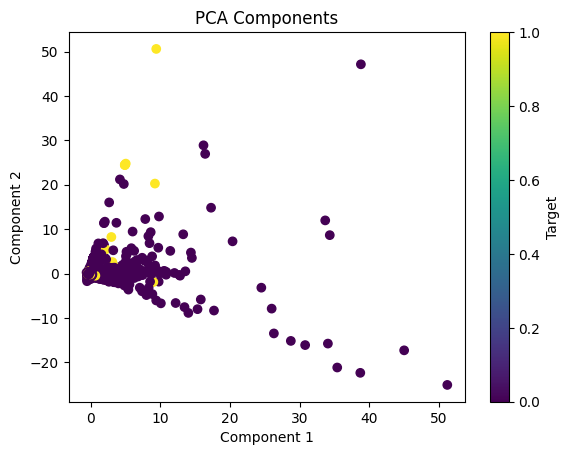

In [131]:
std_all = StandardScaler()
train_data_std = std_all.fit_transform(X_train)
train_data_std = pd.DataFrame(train_data_std, columns=X_train.columns)

pca = PCA(n_components=2)
components = pca.fit_transform(train_data_std)

plt.scatter(components[:, 0], components[:, 1], c=y_train)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Components')
plt.colorbar(label='Target')
plt.show()

In [122]:
# Standaryzacja
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)
sc_test = sc.transform(X_test)

##### Oversampling using SMOTE

In [132]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {sc_train.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(sc_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((7872, 27), (7872,))
Shape of the training after SMOTE: ((12230, 27), (12230,))


### Logistic Regression

In [139]:
#Logistic Regression
LR = LogisticRegression(random_state=42)
LR.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = sc.transform(X_test)

y_pred = LR.predict(sc_test)

In [140]:
print(y_test.shape)
y_test.value_counts()

(1969,)


FLAG
0    1547
1     422
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       0.94      0.54      0.68      1547
           1       0.34      0.87      0.49       422

    accuracy                           0.61      1969
   macro avg       0.64      0.70      0.59      1969
weighted avg       0.81      0.61      0.64      1969

[[832 715]
 [ 55 367]]


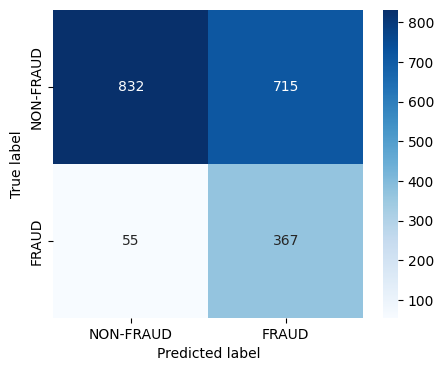

In [141]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
class_names = ['NON-FRAUD', 'FRAUD']
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

###### Analizując macierz pomyłek: Model LR prawidłowo zidentyfikował 367 (TP) przypadków Oszustw z 422 (P). Model regresji logistycznej błędnie zaklasyfikował 715 przypadków jako oszustwa (FP - False Positive) spośród 1547 przypadków, które w rzeczywistości nie były oszustwami.  Model ma tendencję do wykrywania mniej przypadków oszustw (367 na 422), ale błędnie klasyfikuje dużej liczby transakcji jako oszustwa, które w rzeczywistości nimi nie są (709 na 1547).

### Random Forest

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1547
           1       0.97      0.97      0.97       422

    accuracy                           0.99      1969
   macro avg       0.98      0.98      0.98      1969
weighted avg       0.99      0.99      0.99      1969



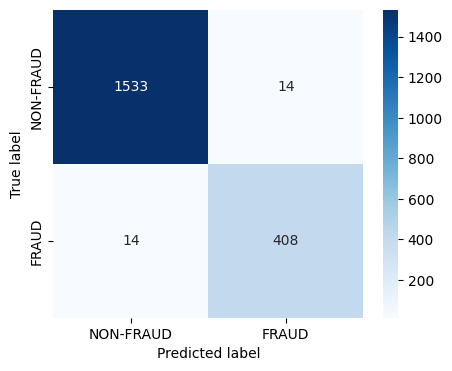

In [142]:
#RandomForest Classifier
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = sc.transform(X_test)

y_pred = RF.predict(sc_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
class_names = ['NON-FRAUD', 'FRAUD']
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


###### Model RF daje bardziej efektywne wyniki, niż LR. RF model nie wykrył 14 przypadków OSZUSTW.

### KNN

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1547
           1       0.79      0.92      0.85       422

    accuracy                           0.93      1969
   macro avg       0.88      0.93      0.90      1969
weighted avg       0.94      0.93      0.93      1969



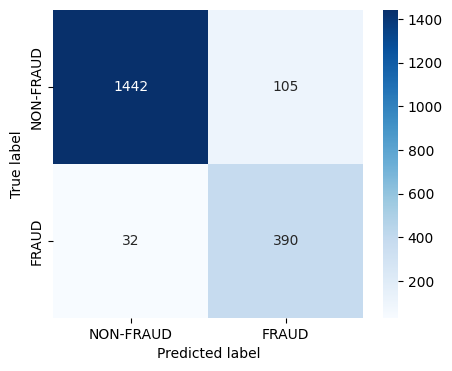

In [143]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_tr_resample, y_tr_resample)


# Transform test features
sc_test = sc.transform(X_test)

y_pred = knn.predict(sc_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
class_names = ['NON-FRAUD', 'FRAUD']
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


###### Wyniki klasyfikatora KNN są gorsze niż uzyskane dla modelu RandomForest (RF). W przypadku transakcji niebędących oszustwami, klasyfikator KNN błędnie zakwalifikował 105 przypadków jako oszustwa, podczas gdy w rzeczywistości były to transakcje niebędące oszustwami. Jeśli chodzi o identyfikację oszustw, KNN pominął 32 transakcjie spośród 422 przypadków, 


### Gradien Boosting

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1547
           1       0.91      0.97      0.94       422

    accuracy                           0.97      1969
   macro avg       0.95      0.97      0.96      1969
weighted avg       0.97      0.97      0.97      1969



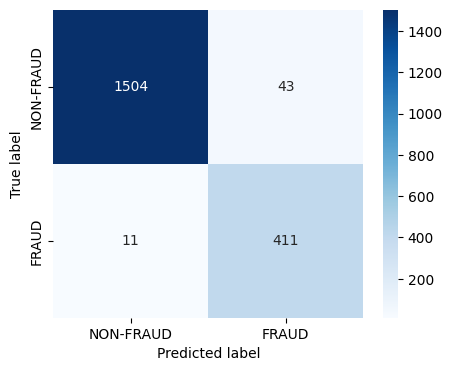

In [136]:

grad = GradientBoostingClassifier(random_state=42)
grad.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = sc.transform(X_test)

y_pred = grad.predict(sc_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
class_names = ['NON-FRAUD', 'FRAUD']
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


##### Wnioski

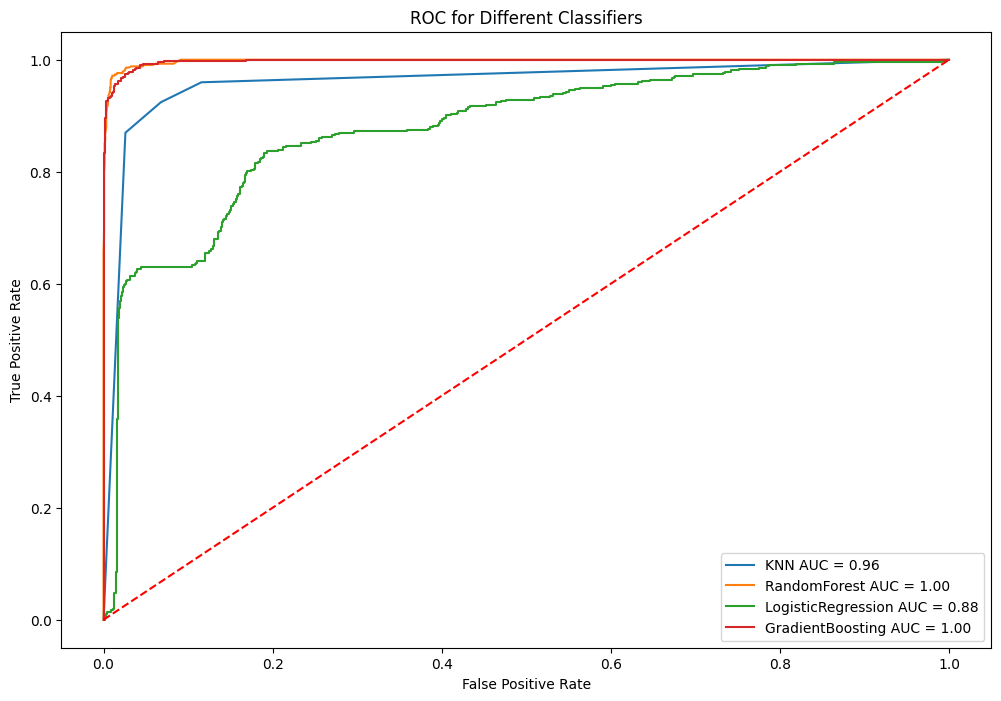

In [138]:
# Plotting AUC for KNN, RandomForest, LogisticRegression and GradientBoosting
models = [knn, RF, LR, grad]
model_names = ['KNN', 'RandomForest', 'LogisticRegression','GradientBoosting']

plt.figure(figsize=(12,8))
plt.title('ROC for Different Classifiers')

for model, name in zip(models, model_names):
    probs = model.predict_proba(sc_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (name, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###### Po wygenerowaniu krzywej ROC widzimy, że model Linear Regresion poradził sobie fatalnie. Najlepsze wyniki otrzymaliśmy dla modelu RandomForest oraz GradientBoosting.